## AIFS: AI Fashion Stylist as a multi-modal ChatBot
This notebook shows how to use the AIFS to get garment recommendations for the product in the database via interacting 
with a chatbot.
Right now, the chatbot supports the following scenarios:
1) Seasonal recomendations,
2) Event-based recommendations,
3) Image-based recommendations.

Also, this notebook shows how to try-on the proposed garments on Tylor Swift, as a part of the chatbot or separately.

### Setup the environment variables

In [1]:
dataset_root = None  # a path to the h-and-m-personalized-fashion-recommendations dataset
api_key = None  # your OpenAI API key

### Initialize the data manager

In [2]:
from data_manager import DataManager

# Initializing data manager. It has access to the images from the dataset and access to the database of image
# multi-modal embeddings (pre-computed with an advanced version of CLIP).
data_manager = DataManager(
    dataset_root=dataset_root,
    database_root=f"./image_database/",
)

/opt/conda/envs/inpainting/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Data loaded with 33483 articles.
Database loaded with 33483 articles.


Loading checkpoint shards: 100%|██████████| 2/2 [00:01<00:00,  1.12it/s]


### Chat with AIFS
To start chatting, simply run the cell.
To stop chatting, enter "q" in the chat.

Anna: Hey 

AIFS: Hey Anna! 😊 How's your day going? 

I'm super excited to help you find some amazing new summer clothes. Do you have any specific preferences, or should I surprise you with some fabulous recommendations? 

Anna: I'm looking for a dress 

AIFS: Awesome! Dresses are perfect for the summer. Do you have any preferences in terms of color or style? Maybe something flowy and light, or perhaps a bold and striking piece? 

Anna: not too sure 

AIFS: Just a moment, looking for something exciting for you...


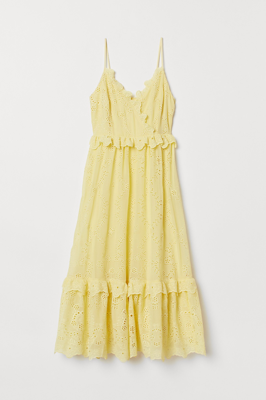

AIFS: I found a beautiful dress for you, Anna! It's a yellow cocktail dress with a lovely eyelet design. The dress features a scalloped neckline, thin adjustable straps, and a fitted bodice that flows into a loose, airy skirt with a ruffled hemline. This dress has a wonderfully feminine and light aesthetic, perfect for the summer season.

How does that sound? Also, you can ask me "How would it look on Taylor Swift", and I will generate an image of Taylor Swift wearing the garment for you! 

Anna: I think the colour is too light for me 

AIFS: Just a moment, looking for something exciting for you...


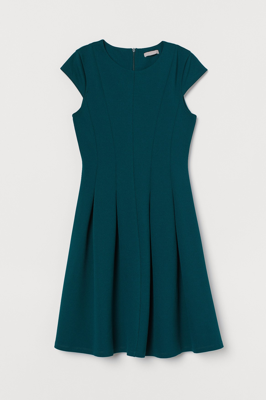

AIFS: I found a vibrant teal cocktail dress that's sure to look amazing on you, Anna! This dress has a fitted bodice with cap sleeves and a round neckline. The vertical seams create a flattering shape, and it transitions into a flared skirt with pleats at the waist for a relaxed silhouette. Plus, the fabric has a smooth texture with a slight stretch, making it both comfortable and stylish.

What do you think of this one? Also, feel free to ask me "How would it look on Taylor Swift", and I can generate an image of her wearing the dress for you! 

Anna: I like that the colour is darker but I prefered the style of the previous dress 

AIFS: Just a moment, looking for something exciting for you...


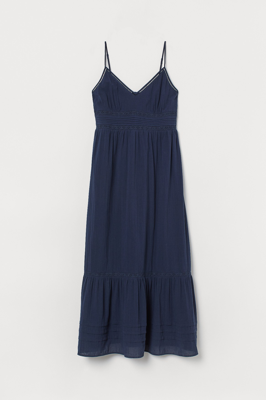

AIFS: I found a beautiful dark navy blue maxi dress for you, Anna! It features thin adjustable straps and a V-neckline, just like you prefer. The dress has a fitted bodice with gathered detailing, flowing into a loose skirt that extends to the ankles. The lower part of the dress is exquisitely detailed with a ruffled hemline and subtle horizontal pleats, giving it a soft and lightweight feel.

How does this one sound? You can also ask me "How would it look on Taylor Swift", and I can show you an image of her wearing it! 

Anna: Yes, perfect.  

AIFS: I'm so glad you like it, Anna! This dark navy blue maxi dress will definitely make you shine this summer. 

Feel free to try it on in the store whenever you get a chance. And remember, you can ask me "How would it look on Taylor Swift" if you want to see an image of her wearing the dress.

Is there anything else I can help you with today? 😊 

Anna: How would it look on Taylor Swift? 

AIFS: One second, generating an image of Tylor Swift we

Loading pipeline components...: 100%|██████████| 7/7 [00:01<00:00,  6.62it/s]
Token indices sequence length is longer than the specified maximum sequence length for this model (84 > 77). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (84 > 77). Running this sequence through the model will result in indexing errors
  0%|          | 0/25 [00:00<?, ?it/s]/opt/conda/envs/inpainting/lib/python3.12/site-packages/diffusers/utils/torch_utils.py:107: UserWarning: ComplexHalf support is experimental and many operators don't support it yet. (Triggered internally at /opt/conda/conda-bld/pytorch_1716905971214/work/aten/src/ATen/EmptyTensor.cpp:41.)
  x_freq = fftn(x, dim=(-2, -1))
100%|██████████| 25/25 [00:03<00:00,  8.08it/s]


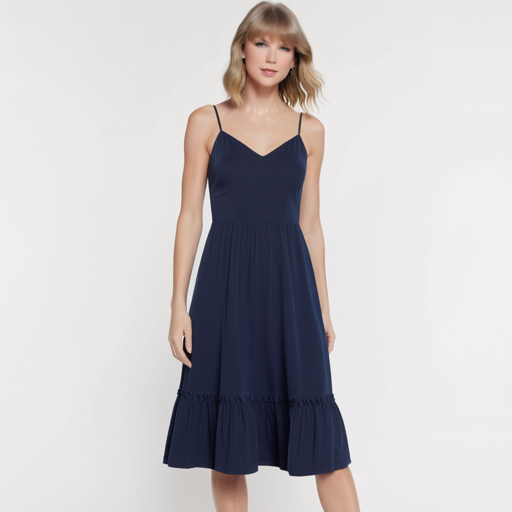

Anna: Love it! Thank you so much. 

AIFS: You're very welcome, Anna! I'm thrilled that you love the dress. Enjoy wearing it this summer! 🌞

If you need any more fashion advice or have any other questions, feel free to reach out anytime. Happy shopping! 😊 

Thank you so much for coming to the H&M store online. Have a great day! 
Goodbye!


In [3]:
from aifs_assistant import AIFS, Scenario

# this refers to the scenarios mentioned in the assignment.
# This repo implements the first three scenarios, in the following order:
# 1) Seasonal recomendations,
# 2) Event-based recommendations,
# 3) Image-based recommendations.
conversation_scenario = Scenario.SCENARIO_1

assistant = AIFS(
    scenario=conversation_scenario,
    data_manager=data_manager,
    api_key=api_key,
    in_jupyter=True,
)

assistant.chat()

### In this section, we will show how to try-on the proposed garments on Tylor Swift.
While this functionality is available as the part of the chatbot, here one can try it independently of the chatbot.

Loading pipeline components...: 100%|██████████| 7/7 [00:01<00:00,  6.16it/s]


Image Caption: skirt featuring a blue and white floral pattern, with an elastic waistband, a straight silhouette, and a mid-length cut


100%|██████████| 25/25 [00:02<00:00,  8.68it/s]


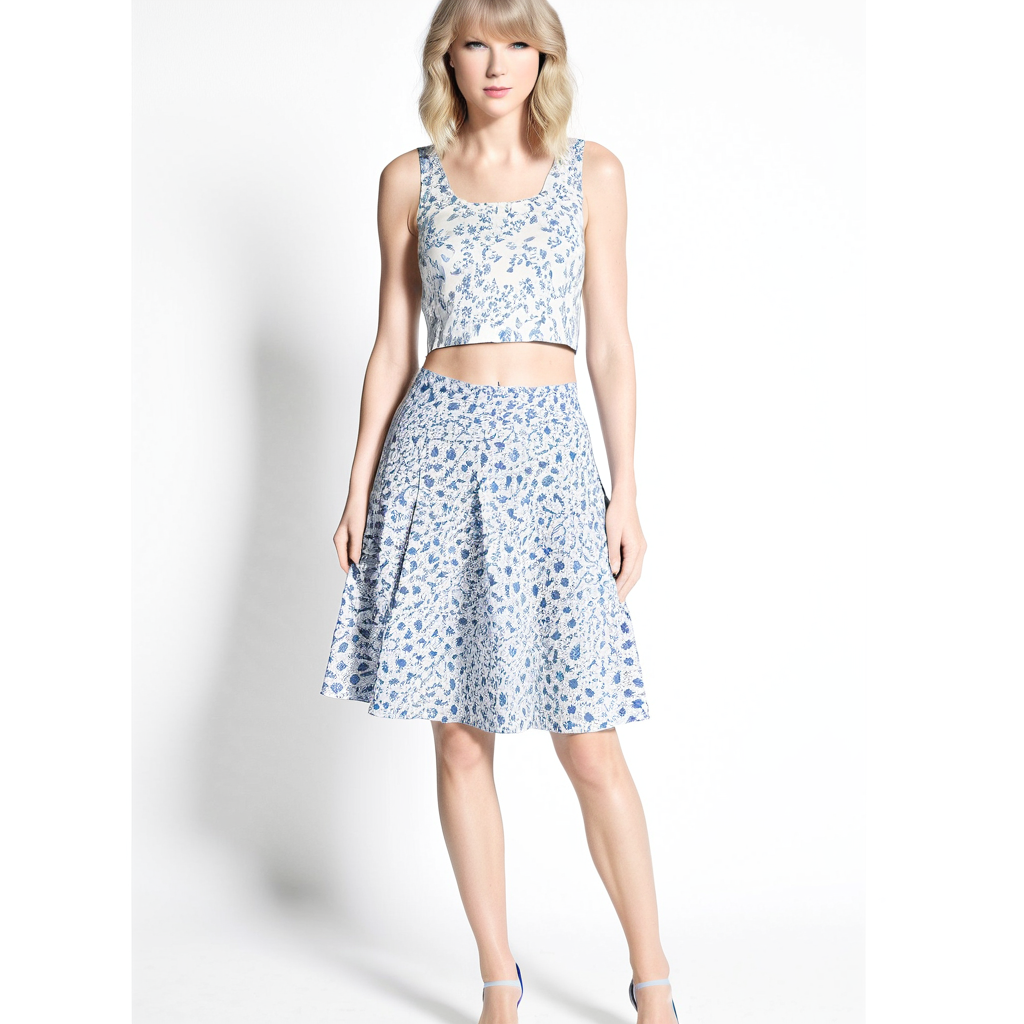

In [22]:
from image_generation import generate_image, get_pipeline

# Initializing the pipeline for image generation. This is a heavy operation, so it is better to do it once.
diffusion_pipeline = get_pipeline(device="cuda")

# A photo of a white dress with flowers from H&M website. This can be a path to the local image as well.
image_url = "https://lp2.hm.com/hmgoepprod?set=quality%5B79%5D%2Csource%5B%2F2f%2F1f%2F2f1fd1a6bd45274a06b27132b1988d5e720a0a8c.jpg%5D%2Corigin%5Bdam%5D%2Ccategory%5B%5D%2Ctype%5BDESCRIPTIVESTILLLIFE%5D%2Cres%5Bm%5D%2Chmver%5B2%5D&call=url[file:/product/fullscreen]"
image = generate_image(image_url, api_key=api_key, verbose=True, pipeline=diffusion_pipeline)
image

# Generate a video out of an image
This step is very slow and takes a lot of GPU. Not sure the results are worth it :)

100%|██████████| 50/50 [01:24<00:00,  1.68s/it]


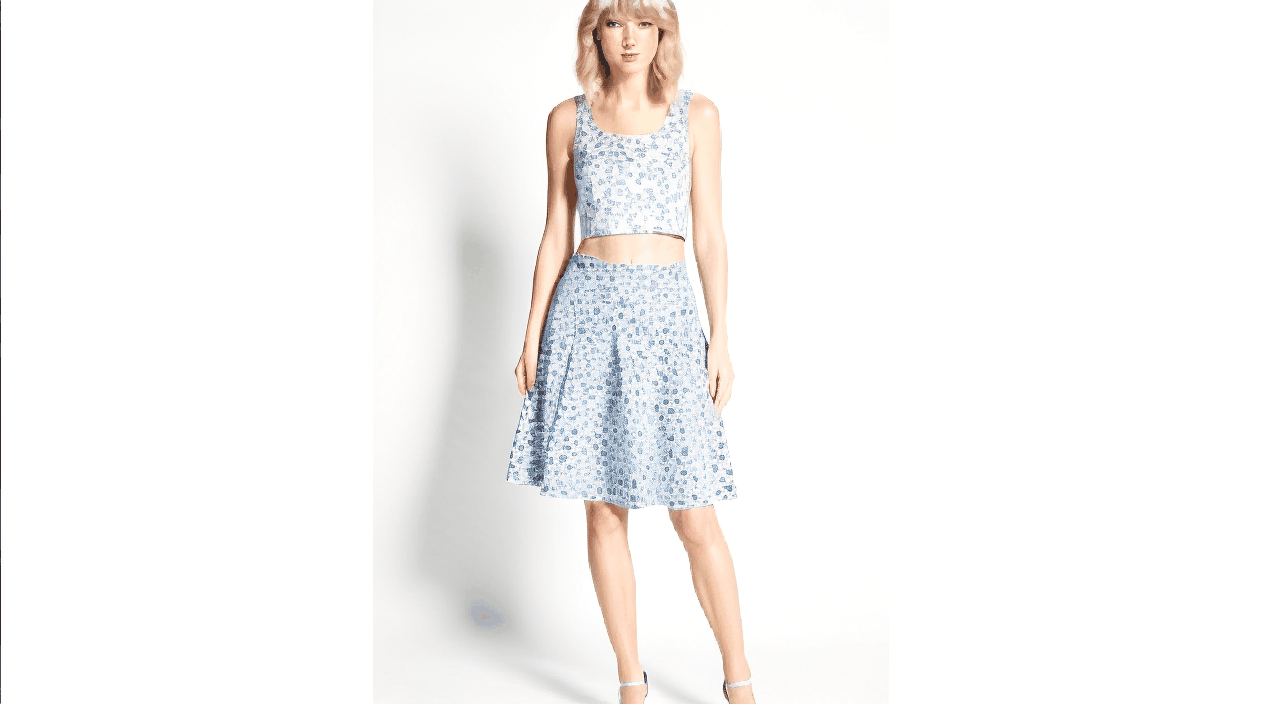

In [27]:
import torch
from diffusers import StableVideoDiffusionPipeline, I2VGenXLPipeline
from diffusers.utils import export_to_gif, load_image
from IPython.display import Image as IPImage

diffusion_pipeline = I2VGenXLPipeline.from_pretrained("ali-vilab/i2vgen-xl", torch_dtype=torch.float16, variant="fp16")
diffusion_pipeline.enable_model_cpu_offload()

# This assumes the image 'image" has been generated in the previous cell.
scale = 576 / max(image.size)
gen_image_center = image.resize((int(image.width * scale), int(image.height * scale)))
gen_image = Image.new("RGB", (1024, 576), (255, 255, 255))
gen_image.paste(gen_image_center, (512 - int(gen_image_center.size[0] / 2), 0))

generator = torch.manual_seed(42)
prompt = "Tylor Swift dancing a little"
negative_prompt = "Distorted, discontinuous, Ugly, blurry, low resolution, motionless, static, disfigured, disconnected limbs, Ugly faces, incomplete arms"
frames = diffusion_pipeline(
    prompt=prompt,
    image=gen_image,
    num_inference_steps=50,
    negative_prompt=negative_prompt,
    guidance_scale=9.0,
    generator=generator,
).frames[0]
# frames = diffusion_pipeline(gen_image, decode_chunk_size=8, generator=generator).frames[0]

# export_to_gif(frames, "generated.gif", fps=7)
export_to_gif(frames, "generated.gif", fps=7)

# play the video
IPImage(filename="generated.gif")